<a href="https://colab.research.google.com/github/7679735335/Milk-Quality-Prediction/blob/main/milk_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [3]:

! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d cpluzshrijayan/milkquality

  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 1.25MB/s]


In [5]:
import zipfile as zp 
with zp.ZipFile('/content/milkquality.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("/content/milknew.csv")
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [9]:
print(data.isnull().sum())

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [10]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [11]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [12]:
data["Taste"].unique()

array([1, 0])

In [13]:
data["Odor"].unique()

array([0, 1])

In [14]:
data["Fat "].unique()

array([1, 0])

In [15]:
data["Turbidity"].unique()

array([0, 1])

In [16]:
df = data.astype({"Taste":'category',"Odor":'category',"Fat ":'category',"Turbidity":'category' })

In [17]:
# define ordinal encoding
label_encoder = preprocessing.LabelEncoder()
# transform data
df['Grade']= label_encoder.fit_transform(df['Grade'])

In [18]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


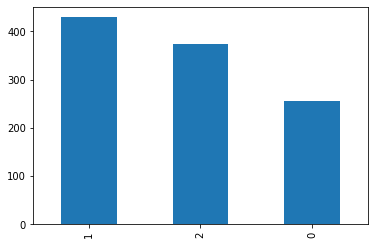

In [19]:
df['Grade'].value_counts().plot.bar()

In [20]:
x=df.drop("Grade",1)   #independent variables
y=df["Grade"]             #Response Variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


**Feature Selection**

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)


ExtraTreesClassifier()

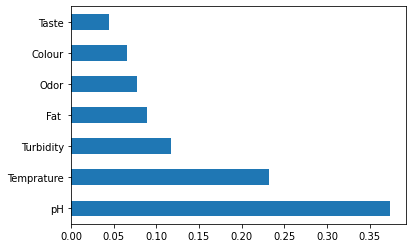

In [22]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

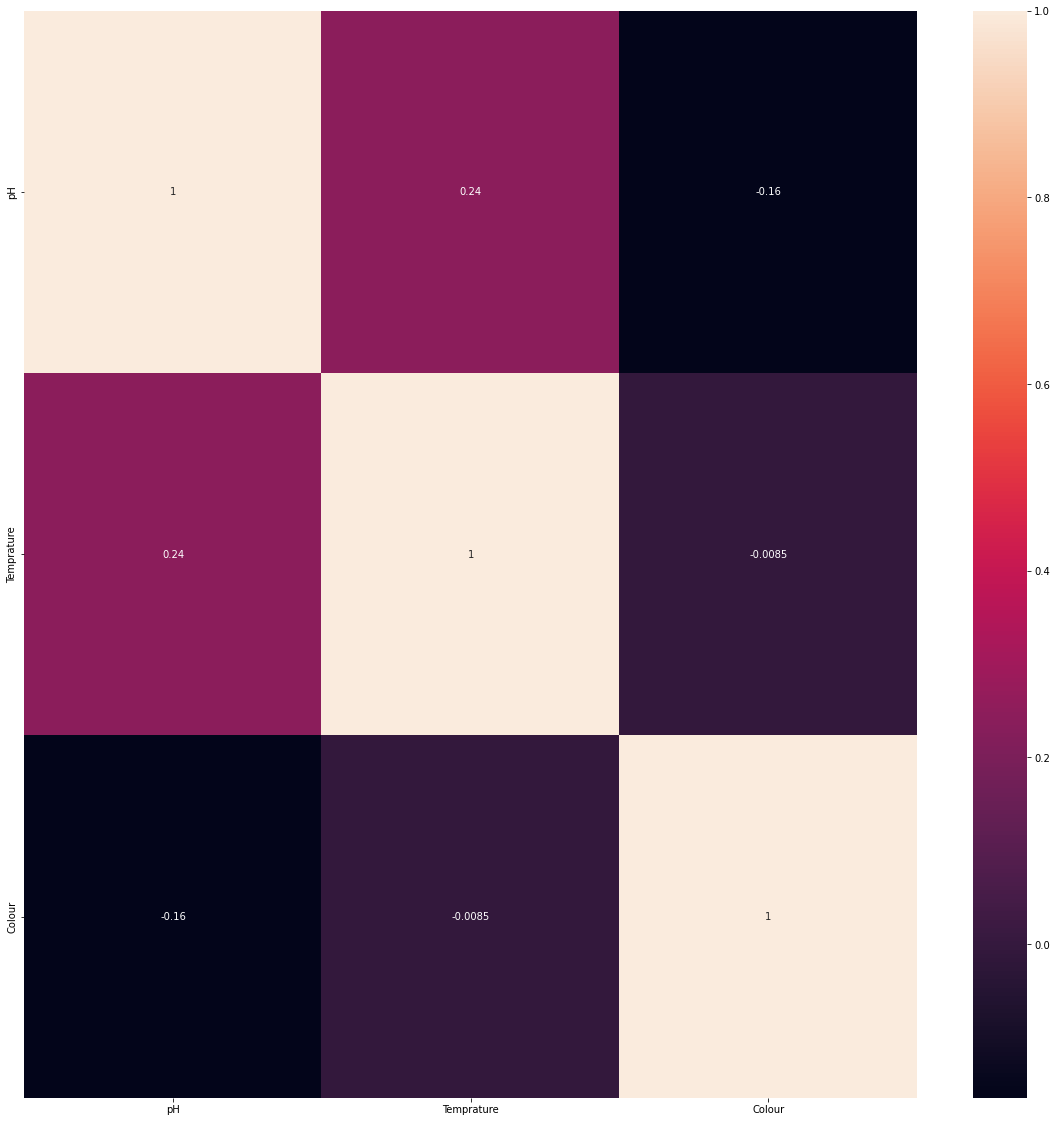

In [23]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

**Model Fitting**

In [24]:
from sklearn.model_selection import train_test_split
#data slipt into 80% and 20%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [27]:
ls=list(x_test.shape)
print("accuracy :",round(((cm[0,0]+cm[1,1])/ls[0])*100),'%')

accuracy : 59 %
